# Feature 선택

## 선정 기준
1. EDA 결과 상관계수가 높고 시각화에서 유의미한 결과가 나온 feature로 1차 선택</br>
2. 일반적으로 예상할 수 있는 결과를 나타낸 feature 위주로 선택</br>
    ex) 나이가 적은 고객들이 이탈율이 높다고 생각함 => Age 변수는 나이가 많아질수록 이탈율 높아짐.(선택X)</br>
    Under 30 변수는 30세 이하 고객의 이탈율이 높았음.(선택O)</br> 
3. 같은 성격을 가진 feature 중에서 시각화 결과가 더 뚜렷한 feature 선택</br>
4. 한국 통신사 시장과 맞지 않는 feature 제외</br>
    ex) Contract-알뜰폰은 약정없이 월 청구, 통신3사는 무조건 1년 or 2년 약정)</br>
5. 그 외 중요하다고 생각하는 feature 선정

## 선정 결과&선정 기준
* Dependents (3)
* under 30 (2)
* Monthly Charge (2)
* Total Revenue (2)

* Tenure in Months (5)
* Internet Service (5) : 예상과 다른 결과지만 중요하다고 생각하여 선정
* Device Protection Plan (2)
* Unlimited Data (2)
* Streaming Movies (5)

## 파생변수
예상 해지 날짜 구하기 위함
* 가입기간(일)
* 가입일자(가입기간으로 계산)

# 데이터 로드

In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

%matplotlib inline

In [2]:
df = pd.read_excel("total.xlsx")
print(df.shape)
df.head()

(7043, 46)


,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Service ID,...,Total Revenue,Status ID,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,IJKDQVSWH3522,...,59.65,SWSORB1252,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,BFKMZJAIE2285,...,1024.10,SNAEQA8572,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,EIMVJQBMT7187,...,1910.88,LMBQNN3714,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,EROZQXDUU4979,...,2995.07,VRZYZI9978,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,GEEYSJUHY6991,...,3102.36,FDNAKX1688,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [3]:
# Customer ID & 선정한 컬럼 & 'Churn Label', 'Churn Score'
selected_cols = ['Customer ID','Dependents', 'Under 30', 'Monthly Charge', 'Total Revenue', 'Tenure in Months', 'Internet Service', 
                 'Device Protection Plan', 'Unlimited Data', 'Streaming Movies', 'Churn Label', 'Churn Score']

new_df = df[selected_cols]

new_df

,Customer ID,Dependents,Under 30,Monthly Charge,Total Revenue,Tenure in Months,Internet Service,Device Protection Plan,Unlimited Data,Streaming Movies,Churn Label,Churn Score
0,8779-QRDMV,No,No,39.65,59.65,1,Yes,Yes,No,Yes,Yes,91
1,7495-OOKFY,Yes,No,80.65,1024.10,8,Yes,No,Yes,No,Yes,69
2,1658-BYGOY,Yes,No,95.45,1910.88,18,Yes,No,Yes,Yes,Yes,81
3,4598-XLKNJ,Yes,No,98.50,2995.07,25,Yes,Yes,Yes,Yes,Yes,88
4,4846-WHAFZ,Yes,No,76.50,3102.36,37,Yes,No,Yes,No,Yes,67
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,No,21.15,3039.53,72,No,No,No,No,No,45
7039,6840-RESVB,Yes,No,84.80,2807.47,24,Yes,Yes,Yes,Yes,No,59
7040,2234-XADUH,Yes,No,103.20,9453.04,72,Yes,Yes,Yes,Yes,No,71
7041,4801-JZAZL,Yes,No,29.60,319.21,11,Yes,No,Yes,No,No,59


# label 값 맞추기

## Yes, No -> 1, 0

In [4]:
target_cols = ['Under 30','Dependents', 'Internet Service','Device Protection Plan','Streaming Movies', 'Unlimited Data','Churn Label']

for col in target_cols:
    new_df[col] = new_df[col].map({'Yes': 1, 'No': 0})
    

new_df.head()

C:\Users\ksh\AppData\Local\Temp\ipykernel_7852\2924241732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = new_df[col].map({'Yes': 1, 'No': 0})
C:\Users\ksh\AppData\Local\Temp\ipykernel_7852\2924241732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = new_df[col].map({'Yes': 1, 'No': 0})
C:\Users\ksh\AppData\Local\Temp\ipykernel_7852\2924241732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,Customer ID,Dependents,Under 30,Monthly Charge,Total Revenue,Tenure in Months,Internet Service,Device Protection Plan,Unlimited Data,Streaming Movies,Churn Label,Churn Score
0,8779-QRDMV,0,0,39.65,59.65,1,1,1,0,1,1,91
1,7495-OOKFY,1,0,80.65,1024.10,8,1,0,1,0,1,69
2,1658-BYGOY,1,0,95.45,1910.88,18,1,0,1,1,1,81
3,4598-XLKNJ,1,0,98.50,2995.07,25,1,1,1,1,1,88
4,4846-WHAFZ,1,0,76.50,3102.36,37,1,0,1,0,1,67


# 파생변수 생성

## 가입일자

Churn Label: Yes = 고객이 이번 분기 이탈 / NO = 고객이 남아 있음.</br>
Tenure in Months : 3분기 말(2023년 9월 30일) 기준 가입일로부터의 개월 수 (이탈 여부 상관 X)</br>


 => 기준 날짜 : 2023년 9월 30일</br>
 => 기준 날짜를 기준으로 Tenure in Months 변수를 이용하여 가입 일자 역계산</br>

In [5]:
# 기준 날짜 2023년 10월 31일 설정
base_date = datetime(2023, 9, 30)

# 'Contract Date' 컬럼 생성
new_df['Contract Date'] = new_df['Tenure in Months'].apply(lambda x: base_date - timedelta(days=x*30))  # 가입개월 수를 일수로 변환하여 뺀다.

# 'Contract Date' 컬럼에서 일자(day) 랜덤 생성
new_df['Contract Date'] = new_df.apply(lambda row: row['Contract Date'].replace(day=np.random.randint(1, 29)), axis=1)


# 결과 출력
new_df


C:\Users\ksh\AppData\Local\Temp\ipykernel_7852\2692213543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Contract Date'] = new_df['Tenure in Months'].apply(lambda x: base_date - timedelta(days=x*30))  # 가입개월 수를 일수로 변환하여 뺀다.
C:\Users\ksh\AppData\Local\Temp\ipykernel_7852\2692213543.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Contract Date'] = new_df.apply(lambda row: row['Contract Date'].replace(day=np.random.randint(1, 29)), axis=1)


,Customer ID,Dependents,Under 30,Monthly Charge,Total Revenue,Tenure in Months,Internet Service,Device Protection Plan,Unlimited Data,Streaming Movies,Churn Label,Churn Score,Contract Date
0,8779-QRDMV,0,0,39.65,59.65,1,1,1,0,1,1,91,2023-08-14
1,7495-OOKFY,1,0,80.65,1024.10,8,1,0,1,0,1,69,2023-02-04
2,1658-BYGOY,1,0,95.45,1910.88,18,1,0,1,1,1,81,2022-04-20
3,4598-XLKNJ,1,0,98.50,2995.07,25,1,1,1,1,1,88,2021-09-10
4,4846-WHAFZ,1,0,76.50,3102.36,37,1,0,1,0,1,67,2020-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,0,0,21.15,3039.53,72,0,0,0,0,0,45,2017-10-02
7039,6840-RESVB,1,0,84.80,2807.47,24,1,1,1,1,0,59,2021-10-04
7040,2234-XADUH,1,0,103.20,9453.04,72,1,1,1,1,0,71,2017-10-15
7041,4801-JZAZL,1,0,29.60,319.21,11,1,0,1,0,0,59,2022-11-15


## 가입기간(일)

가입일자부터 2023년 9월 30일까지의 일수로 계산

In [6]:
# 2023년 9월 30일
end_date = datetime(2023, 9, 30)

# Contract Date 컬럼을 datetime 형식으로 변환
new_df['Contract Date'] = pd.to_datetime(new_df['Contract Date'])

# Contract Period 계산 및 저장
new_df['Contract Period'] = (end_date - new_df['Contract Date']).dt.days

new_df

C:\Users\ksh\AppData\Local\Temp\ipykernel_7852\3856216189.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Contract Date'] = pd.to_datetime(new_df['Contract Date'])
C:\Users\ksh\AppData\Local\Temp\ipykernel_7852\3856216189.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Contract Period'] = (end_date - new_df['Contract Date']).dt.days


,Customer ID,Dependents,Under 30,Monthly Charge,Total Revenue,Tenure in Months,Internet Service,Device Protection Plan,Unlimited Data,Streaming Movies,Churn Label,Churn Score,Contract Date,Contract Period
0,8779-QRDMV,0,0,39.65,59.65,1,1,1,0,1,1,91,2023-08-14,47
1,7495-OOKFY,1,0,80.65,1024.10,8,1,0,1,0,1,69,2023-02-04,238
2,1658-BYGOY,1,0,95.45,1910.88,18,1,0,1,1,1,81,2022-04-20,528
3,4598-XLKNJ,1,0,98.50,2995.07,25,1,1,1,1,1,88,2021-09-10,750
4,4846-WHAFZ,1,0,76.50,3102.36,37,1,0,1,0,1,67,2020-09-25,1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,0,0,21.15,3039.53,72,0,0,0,0,0,45,2017-10-02,2189
7039,6840-RESVB,1,0,84.80,2807.47,24,1,1,1,1,0,59,2021-10-04,726
7040,2234-XADUH,1,0,103.20,9453.04,72,1,1,1,1,0,71,2017-10-15,2176
7041,4801-JZAZL,1,0,29.60,319.21,11,1,0,1,0,0,59,2022-11-15,319


# 데이터 저장 & 데이터 로드

In [7]:
# 컬럼 순서 변경

col1=new_df.columns[:10].to_list()
col2=new_df.columns[12:].to_list()
col3=new_df.columns[10:12].to_list()
new_col=col1+col2+col3
new_df=new_df[new_col]

new_df

,Customer ID,Dependents,Under 30,Monthly Charge,Total Revenue,Tenure in Months,Internet Service,Device Protection Plan,Unlimited Data,Streaming Movies,Contract Date,Contract Period,Churn Label,Churn Score
0,8779-QRDMV,0,0,39.65,59.65,1,1,1,0,1,2023-08-14,47,1,91
1,7495-OOKFY,1,0,80.65,1024.10,8,1,0,1,0,2023-02-04,238,1,69
2,1658-BYGOY,1,0,95.45,1910.88,18,1,0,1,1,2022-04-20,528,1,81
3,4598-XLKNJ,1,0,98.50,2995.07,25,1,1,1,1,2021-09-10,750,1,88
4,4846-WHAFZ,1,0,76.50,3102.36,37,1,0,1,0,2020-09-25,1100,1,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,0,0,21.15,3039.53,72,0,0,0,0,2017-10-02,2189,0,45
7039,6840-RESVB,1,0,84.80,2807.47,24,1,1,1,1,2021-10-04,726,0,59
7040,2234-XADUH,1,0,103.20,9453.04,72,1,1,1,1,2017-10-15,2176,0,71
7041,4801-JZAZL,1,0,29.60,319.21,11,1,0,1,0,2022-11-15,319,0,59


In [8]:
new_df.to_csv("new_total.csv", index=False)

In [9]:
new_df = pd.read_csv("new_total.csv")
new_df

,Customer ID,Dependents,Under 30,Monthly Charge,Total Revenue,Tenure in Months,Internet Service,Device Protection Plan,Unlimited Data,Streaming Movies,Contract Date,Contract Period,Churn Label,Churn Score
0,8779-QRDMV,0,0,39.65,59.65,1,1,1,0,1,2023-08-14,47,1,91
1,7495-OOKFY,1,0,80.65,1024.10,8,1,0,1,0,2023-02-04,238,1,69
2,1658-BYGOY,1,0,95.45,1910.88,18,1,0,1,1,2022-04-20,528,1,81
3,4598-XLKNJ,1,0,98.50,2995.07,25,1,1,1,1,2021-09-10,750,1,88
4,4846-WHAFZ,1,0,76.50,3102.36,37,1,0,1,0,2020-09-25,1100,1,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,0,0,21.15,3039.53,72,0,0,0,0,2017-10-02,2189,0,45
7039,6840-RESVB,1,0,84.80,2807.47,24,1,1,1,1,2021-10-04,726,0,59
7040,2234-XADUH,1,0,103.20,9453.04,72,1,1,1,1,2017-10-15,2176,0,71
7041,4801-JZAZL,1,0,29.60,319.21,11,1,0,1,0,2022-11-15,319,0,59


# 이탈 날짜 예측
이탈한 고객의 데이터만 가지고 학습한 후 이탈하지 않은 고객 데이터를 가지고 예측</br>

* label = Contract Period

Forecast Period를 예측하기 위해 이탈한 고객의 계약기간으로 학습하여 아직 이탈하지 않은 고객의 이탈 예측 날짜(가입일자+예측한 계약기간)를 예측하려고 함.

In [10]:
# 앞서 생성한 Contract Period변수를 이용하여 이탈한 고객의 Forecast Period 변수에 넣어주고 이탈하지 않은 고객은 NaN값을 넣는다.

# 'Churn Label' 컬럼이 1일 경우 'Forecast Period'에 'Contract Period' 값을 저장
new_df.loc[new_df['Churn Label'] == 1, 'Forecast Period'] = new_df['Contract Period']

# 'Churn Label' 컬럼이 0일 경우 'Forecast Period'에 nan을 저장
new_df.loc[new_df['Churn Label'] == 0, 'Forecast Period'] = np.nan

# 결과 확인
new_df

,Customer ID,Dependents,Under 30,Monthly Charge,Total Revenue,Tenure in Months,Internet Service,Device Protection Plan,Unlimited Data,Streaming Movies,Contract Date,Contract Period,Churn Label,Churn Score,Forecast Period
0,8779-QRDMV,0,0,39.65,59.65,1,1,1,0,1,2023-08-14,47,1,91,47.0
1,7495-OOKFY,1,0,80.65,1024.10,8,1,0,1,0,2023-02-04,238,1,69,238.0
2,1658-BYGOY,1,0,95.45,1910.88,18,1,0,1,1,2022-04-20,528,1,81,528.0
3,4598-XLKNJ,1,0,98.50,2995.07,25,1,1,1,1,2021-09-10,750,1,88,750.0
4,4846-WHAFZ,1,0,76.50,3102.36,37,1,0,1,0,2020-09-25,1100,1,67,1100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,0,0,21.15,3039.53,72,0,0,0,0,2017-10-02,2189,0,45,NaN
7039,6840-RESVB,1,0,84.80,2807.47,24,1,1,1,1,2021-10-04,726,0,59,NaN
7040,2234-XADUH,1,0,103.20,9453.04,72,1,1,1,1,2017-10-15,2176,0,71,NaN
7041,4801-JZAZL,1,0,29.60,319.21,11,1,0,1,0,2022-11-15,319,0,59,NaN


## 학습, 예측 데이터셋 나누기

In [11]:
# train 세트 만들기 (이탈한 고객)
train = new_df[new_df["Churn Label"] == 1].copy()
train.shape

(1869, 15)

In [12]:
# test 세트 만들기(이탈하지 않은 고객)
test = new_df[new_df["Churn Label"] == 0].copy()
test.shape

(5174, 15)

## 레이블 컬럼

In [13]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담는다.

label_name = "Forecast Period"
label_name

'Forecast Period'

## 학습, 예측 데이터셋 만들기

In [46]:
# 파생변수 제외한 나머지 feature

feature_names = new_df.columns[[1,2,3,4,6,7,8,9]] # Customer ID, Contract Date는 문자, 날짜형식이므로 제외 & Tenure in Months 제외

feature_names

Index(['Dependents', 'Under 30', 'Monthly Charge', 'Total Revenue',
       'Internet Service', 'Device Protection Plan', 'Unlimited Data',
       'Streaming Movies'],
      dtype='object')

In [47]:
# 학습 세트 만들기

X_train = train[feature_names]
print(X_train.shape)

# 정답 값 만들기

y_train = train[label_name]
print(y_train.shape)

# 예측에 사용할 test 데이터세트 만들기

X_test = test[feature_names]
print(X_test.shape)

# 예측의 정답 값

y_test = test[label_name]
print(y_test.shape)

(1869, 8)
(1869,)
(5174, 8)
(5174,)


## Score

### RMSLE
* 과대평가 된 항목보다는 과소평가된 항목에 패널티를 준다.
* 오차를 제곱해서 평균한 값의 제곱근으로 값이 작을수록 정밀도가 높다.
* 0에 가까운 값이 나올수록 정밀도가 높은 값이다.

In [48]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    # 1을 더하는 이유는 0일때 마이너스 무한대가 되기 때문에 1을 더해주고 로그를 씌운다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

## 학습

### 앙상블모델 - 그라디언트 부스트
* 여러개의 결정트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 기법
* 회귀와 분류에 모두 사용할 수 있음
* 랜덤포레스트와 달리 이진 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.
* 무작위성이 없고 강력한 사전 가지치기가 사용 됨
* 1~5개의 깊지 않은 트리를 사용하기 때문에 메모리를 적게 사용하고 예측이 빠름
* learning_rate : 오차를 얼마나 강하게 보정할 것인지를 제어
* n_estimator의 값을 키우면 앙상블에 트리가 더 많이 추가 되어 모델의 복잡도가 커지고 훈련세트에서의 실수를 바로잡을 기회가 많아지지만 너무 크면 모델이 복잡해지고 오버피팅(과대적합)이 될 수있다.
* max_depth(max_leaf_nodes) 복잡도를 너무 높이지 말고 트리의 깊이가 5보다 깊어지지 않게 한다.

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01);

gbm.fit(X_train, y_train)

preds = gbm.predict(X_train)
score = rmsle(y_train, preds)
print ("RMSLE Value For Gradient Boost: ", score)

RMSLE Value For Gradient Boost:  0.05646218860995069


C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

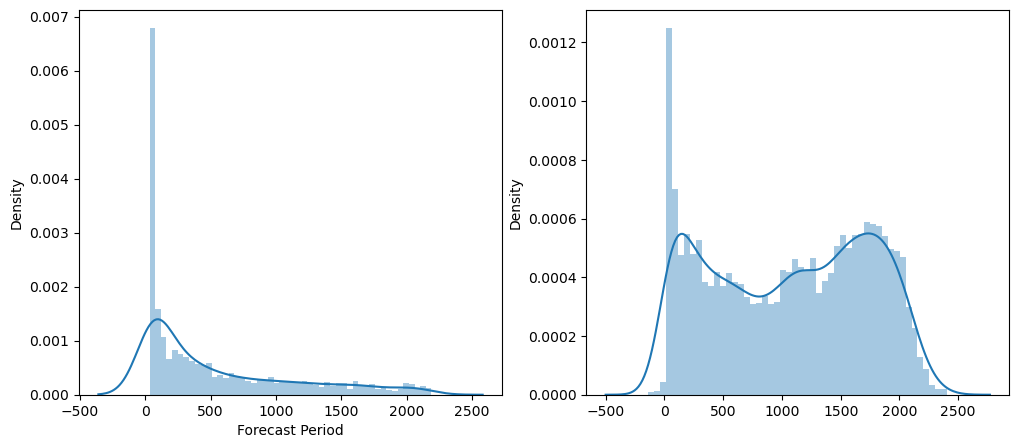

In [51]:
predsTest = gbm.predict(X_test)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
sns.distplot(predsTest,ax=ax2,bins=50)

### 앙상블모델 - 랜덤포레스트

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)

rfModel.fit(X_train, y_train)

preds = rfModel.predict(X_train)
score = rmsle(y_train,preds)
print ("RMSLE Value For Random Forest: ",score)

RMSLE Value For Random Forest:  0.07305956409149907


### 라쏘 Regularization Model - Lasso
* 선형회귀의 Regularization(규제)를 적용하는 대안
* 계수를 0에 가깝게 만들려고 하며 이를 L1규제라고 하며, 어떤 계수는 0이 되기도 하는데 이는 완전히 제외하는 피처가 생긴다는 의미다.
* 피처 선택이 자동으로 이루어진다고도 볼 수 있다.
* alpha 값의 기본 값은 1.0이며, 과소 적합을 줄이기 위해서는 이 값을 줄여야 한다.
* 그리드 서치로 아래 라쏘모델을 실행했을 때 베스트 알파값은 0.0025 max_iter(반복 실행하는 최대 횟수)는 3000을 넣어주었다.

In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

lasso_m_ = Lasso()

# asso 모델의 하이퍼파라미터 중 하나인 alpha 값을 다양하게 설정하기 위한 후보값 정의
alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])

#  Lasso 모델의 하이퍼파라미터 그리드를 정의
# max_iter (반복 최대 횟수)를 3000으로 고정하고, 앞서 정의한 alpha 후보값을 사용하여 그리드를 구성
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

#  GridSearchCV를 사용하여 하이퍼파라미터 그리드 검색을 수행
grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)

# GridSearchCV를 사용하여 Lasso 모델을 훈련
grid_lasso_m.fit( X_train , y_train )

# 훈련된 Lasso 모델을 사용하여 훈련 데이터에 대한 예측
preds = grid_lasso_m.predict(X_train)

# GridSearchCV를 통해 찾은 최적의 하이퍼파라미터 값을 출력
print (grid_lasso_m.best_params_)

# RMSLE를 계산하여 출력
print ("RMSLE Value For Lasso Regression: ",rmsle(y_train,preds))

# GridSearchCV의 결과를 DataFrame 형태로 변환
df_Lasso = pd.DataFrame(grid_lasso_m.cv_results_)
df_Lasso["alpha"] = df_Lasso["params"].apply(lambda x:x["alpha"])
df_Lasso["rmsle"] = df_Lasso["mean_test_score"].apply(lambda x:-x)

df_Lasso[["alpha", "rmsle"]].head()

{'alpha': 10.0, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  nan


C:\Users\ksh\AppData\Local\Temp\ipykernel_7852\3862246338.py:11: RuntimeWarning: invalid value encountered in log
  log_actual = np.log(actual_values + 1)
C:\Users\ksh\AppData\Local\Temp\ipykernel_7852\3862246338.py:11: RuntimeWarning: invalid value encountered in log
  log_actual = np.log(actual_values + 1)
C:\Users\ksh\AppData\Local\Temp\ipykernel_7852\3862246338.py:11: RuntimeWarning: invalid value encountered in log
  log_actual = np.log(actual_values + 1)
C:\Users\ksh\AppData\Local\Temp\ipykernel_7852\3862246338.py:11: RuntimeWarning: invalid value encountered in log
  log_actual = np.log(actual_values + 1)
C:\Users\ksh\AppData\Local\Temp\ipykernel_7852\3862246338.py:11: RuntimeWarning: invalid value encountered in log
  log_actual = np.log(actual_values + 1)
C:\Users\ksh\AppData\Local\Temp\ipykernel_7852\3862246338.py:11: RuntimeWarning: invalid value encountered in log
  log_actual = np.log(actual_values + 1)
C:\Users\ksh\AppData\Local\Temp\ipykernel_7852\3862246338.py:11: Runti

,alpha,rmsle
0,10.000000,NaN
1,1.000000,NaN
2,0.500000,NaN
3,0.333333,NaN
4,0.250000,NaN


### 릿지 Regularization Model - Ridge
* 회귀를 위한 선형모델
* 가중치(w)의 모든 원소가 0에 가깝게 만들어 모든 피처가 주는 영향을 최소화(기울기를 작게 만듦)
* Regularization(정규화)는 오버피팅(과대적합)이 되지 않도록 모델을 강제로 제한한다는 의미
* max_iter(반복 실행하는 최대 횟수)는 3000을 넣어주었다.

#### 그리드서치 객체 생성
* 그리드서치는 '하이퍼파라미터의 값'을 바꿔가며 '모델'의 성능을 교차 검증으로 '평가'해 최적의 하이퍼파라미터 값을 찾아줌
* 그러므로 그리드서치 객체는 다음의 세 가지를 알고 있어야 함
    * 비교 검증해볼 하이퍼파라미터 값 목록
    * 대상 모델
    * 교차 검증용 평가 수단(평가 함수)
* 릿지 모델은 규제를 적용한 회귀 모델인데, 릿지 모델에서 중요한 하이퍼파라미터는 alpha로, 값이 클수록 규제 강도가 커짐.
* 즉, alpha를 적당한 크기로 하면 과대적합 문제를 개선할 수 있음</br>
</br>

* 그리드서치 객체를 생성하는 GridSearchCV()함수의 주요 파라미터
    * estimator : 분류 및 회귀 모델
    * param_grid : 딕셔너리 형태로 모델의 하이퍼파라미터명과 여러 하이퍼파라미터 값을 지정
    * scoring : 평가지표. 사이킷런에서 기본적인 평가지표를 문자열 형태로 제공함. 사이킷런에서 제공하는 평가지표를 사용하지 않고 별도로 만든 평가지표를 사용해도 됨.
    * cv : 교차 검증 분할 개수 (기본값은 5)

In [67]:
ridge_m_ = Ridge()

# 교차 검증용 평가 함수(RMSLE 점수 계산)
ridge_params_ = { 'max_iter':[3000],'alpha':[0.01, 0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}

# make_scorer는 평가지표 계산 함수와 평가지표 점수가 높으면 좋은지 여부 등을 인수로 받는 교차 검증용 평가 함수
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

# 그리드서치(with 릿지) 객체 생성
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)


grid_ridge_m.fit( X_train, y_train_log )
preds = grid_ridge_m.predict(X_train)

print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ", rmsle(y_train,preds))


ridge_df = pd.DataFrame(grid_ridge_m.cv_results_)
ridge_df.head()

{'alpha': 10, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  3.8670326911057344


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002337,0.000661,0.001027,0.000323,0.01,3000,"{'alpha': 0.01, 'max_iter': 3000}",-0.112418,-0.118744,-0.122433,-0.121445,-0.124434,-0.119895,0.004164,8
1,0.002314,0.000250,0.001001,0.000633,0.1,3000,"{'alpha': 0.1, 'max_iter': 3000}",-0.112416,-0.118743,-0.122435,-0.121444,-0.124433,-0.119894,0.004164,7
2,0.001492,0.000470,0.000886,0.000478,1,3000,"{'alpha': 1, 'max_iter': 3000}",-0.112402,-0.118732,-0.122446,-0.121440,-0.124427,-0.119890,0.004170,6
3,0.001479,0.000599,0.000446,0.000549,2,3000,"{'alpha': 2, 'max_iter': 3000}",-0.112387,-0.118721,-0.122459,-0.121437,-0.124421,-0.119885,0.004176,5
4,0.001604,0.000853,0.000529,0.000653,3,3000,"{'alpha': 3, 'max_iter': 3000}",-0.112374,-0.118711,-0.122471,-0.121434,-0.124415,-0.119881,0.004181,4


In [69]:
ridge_df["alpha"] = ridge_df["params"].apply(lambda x:x["alpha"])
ridge_df["rmsle"] = ridge_df["mean_test_score"].apply(lambda x:-x)
ridge_df[["alpha", "rmsle"]].head()

,alpha,rmsle
0,0.01,0.119895
1,0.10,0.119894
2,1.00,0.119890
3,2.00,0.119885
4,3.00,0.119881


## 알고리즘 선택

**앙상블모델 - 그라디언트 부스트

RMSLE Value For Gradient Boost:  0.05646218860995069 으로 가장 0에 가까움.</br>
=> 그라디언트 부스트 모델의 결과값을 이탈하지 않은 고객의 예상 계약기간에 저장

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01);

gbm.fit(X_train, y_train)

preds = gbm.predict(X_train)
score = rmsle(y_train, preds)
print ("RMSLE Value For Gradient Boost: ", score)

RMSLE Value For Gradient Boost:  0.056462188609950746


C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

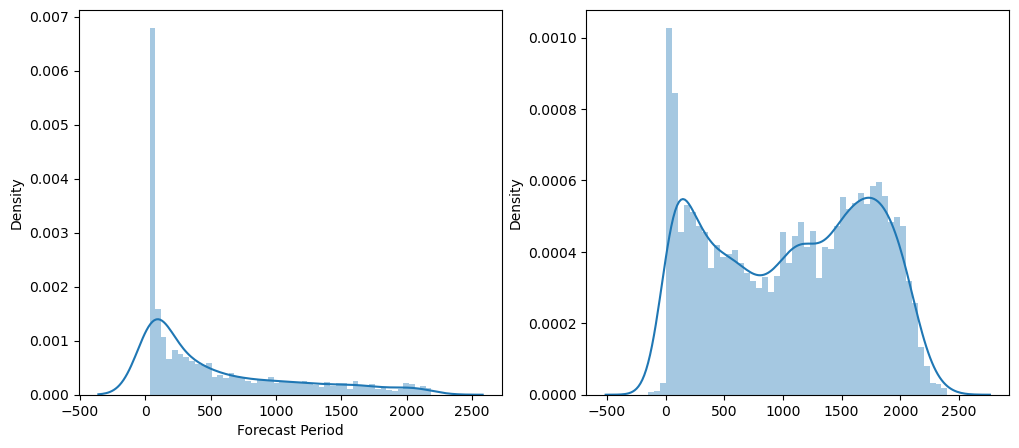

In [56]:
predsTest = gbm.predict(X_test)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
sns.distplot(predsTest,ax=ax2,bins=50)

### 데이터 저장

In [57]:
# 예측용 데이터셋(test)의 Forecast Period 컬럼에 predsTest 데이터 저장
test['Forecast Period'] = predsTest.astype(int)

# test 데이터프레임을 출력하여 확인
test


,Customer ID,Dependents,Under 30,Monthly Charge,Total Revenue,Tenure in Months,Internet Service,Device Protection Plan,Unlimited Data,Streaming Movies,Contract Date,Contract Period,Churn Label,Churn Score,Forecast Period
476,3841-NFECX,0,0,96.35,10105.37,71,1,1,1,0,2017-11-20,2140,0,38,2017
477,4929-XIHVW,0,0,95.50,257.85,2,1,1,0,1,2023-08-25,36,0,69,31
478,3413-BMNZE,0,0,45.25,57.14,1,1,0,1,0,2023-08-19,42,0,40,55
479,8012-SOUDQ,0,0,90.25,4379.69,43,1,0,1,0,2020-03-14,1295,0,52,1024
480,6575-SUVOI,0,0,69.50,2517.65,25,1,0,1,0,2021-09-28,732,0,25,873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,0,0,21.15,3039.53,72,0,0,0,0,2017-10-02,2189,0,45,1484
7039,6840-RESVB,1,0,84.80,2807.47,24,1,1,1,1,2021-10-04,726,0,59,925
7040,2234-XADUH,1,0,103.20,9453.04,72,1,1,1,1,2017-10-15,2176,0,71,1911
7041,4801-JZAZL,1,0,29.60,319.21,11,1,0,1,0,2022-11-15,319,0,59,343


In [58]:
# train과 test 데이터셋 합치기

# train과 test 데이터프레임을 열 방향으로 합치기
combined_df = pd.concat([train, test], axis=0, ignore_index=True)

# ignore_index=True를 설정하면 새로운 인덱스가 생성됩니다.

# 결과 데이터프레임 출력
combined_df


,Customer ID,Dependents,Under 30,Monthly Charge,Total Revenue,Tenure in Months,Internet Service,Device Protection Plan,Unlimited Data,Streaming Movies,Contract Date,Contract Period,Churn Label,Churn Score,Forecast Period
0,8779-QRDMV,0,0,39.65,59.65,1,1,1,0,1,2023-08-14,47,1,91,47.0
1,7495-OOKFY,1,0,80.65,1024.10,8,1,0,1,0,2023-02-04,238,1,69,238.0
2,1658-BYGOY,1,0,95.45,1910.88,18,1,0,1,1,2022-04-20,528,1,81,528.0
3,4598-XLKNJ,1,0,98.50,2995.07,25,1,1,1,1,2021-09-10,750,1,88,750.0
4,4846-WHAFZ,1,0,76.50,3102.36,37,1,0,1,0,2020-09-25,1100,1,67,1100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,0,0,21.15,3039.53,72,0,0,0,0,2017-10-02,2189,0,45,1484.0
7039,6840-RESVB,1,0,84.80,2807.47,24,1,1,1,1,2021-10-04,726,0,59,925.0
7040,2234-XADUH,1,0,103.20,9453.04,72,1,1,1,1,2017-10-15,2176,0,71,1911.0
7041,4801-JZAZL,1,0,29.60,319.21,11,1,0,1,0,2022-11-15,319,0,59,343.0


In [59]:
combined_df.to_csv("Forecast Period.csv", index=False)

### 실제 계약기간인 Contract Period와 비교

C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ksh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


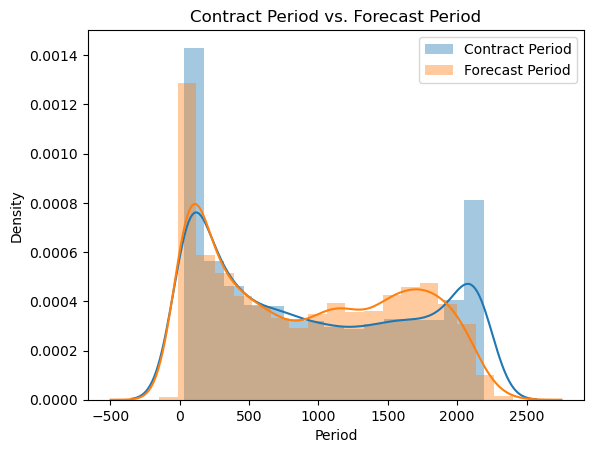

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# test 데이터프레임의 'Contract Period'와 'Forecast Period' 컬럼 비교
sns.distplot(combined_df['Contract Period'], label='Contract Period')
sns.distplot(combined_df['Forecast Period'], label='Forecast Period')

# 범례 추가
plt.legend()

# 그래프 제목 추가
plt.title('Contract Period vs. Forecast Period')

# x축 레이블 추가
plt.xlabel('Period')

# 그래프 표시
plt.show()


2300일쯤을 제외하면 정답과 비슷한 예측 결과을 보여줌.